In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


 ## 1) Linear Regression ## 

In [71]:
df.shape

(300, 2)

In [72]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [74]:
df.columns = ['Signal', 'Density']

In [75]:
df.head(2)

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719


<AxesSubplot:xlabel='Signal', ylabel='Density'>

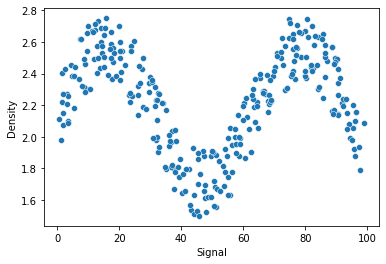

In [76]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [77]:
X = df['Signal'].values.reshape(-1, 1) # This has to be done if there is only feature in the dataset else (1, -1) if we have only one row in the data
y = df['Density']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr_model = LinearRegression()

In [82]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [83]:
lr_preds = lr_model.predict(X_test)

In [84]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [86]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [87]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [88]:
signal_range = np.arange(0, 100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [89]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

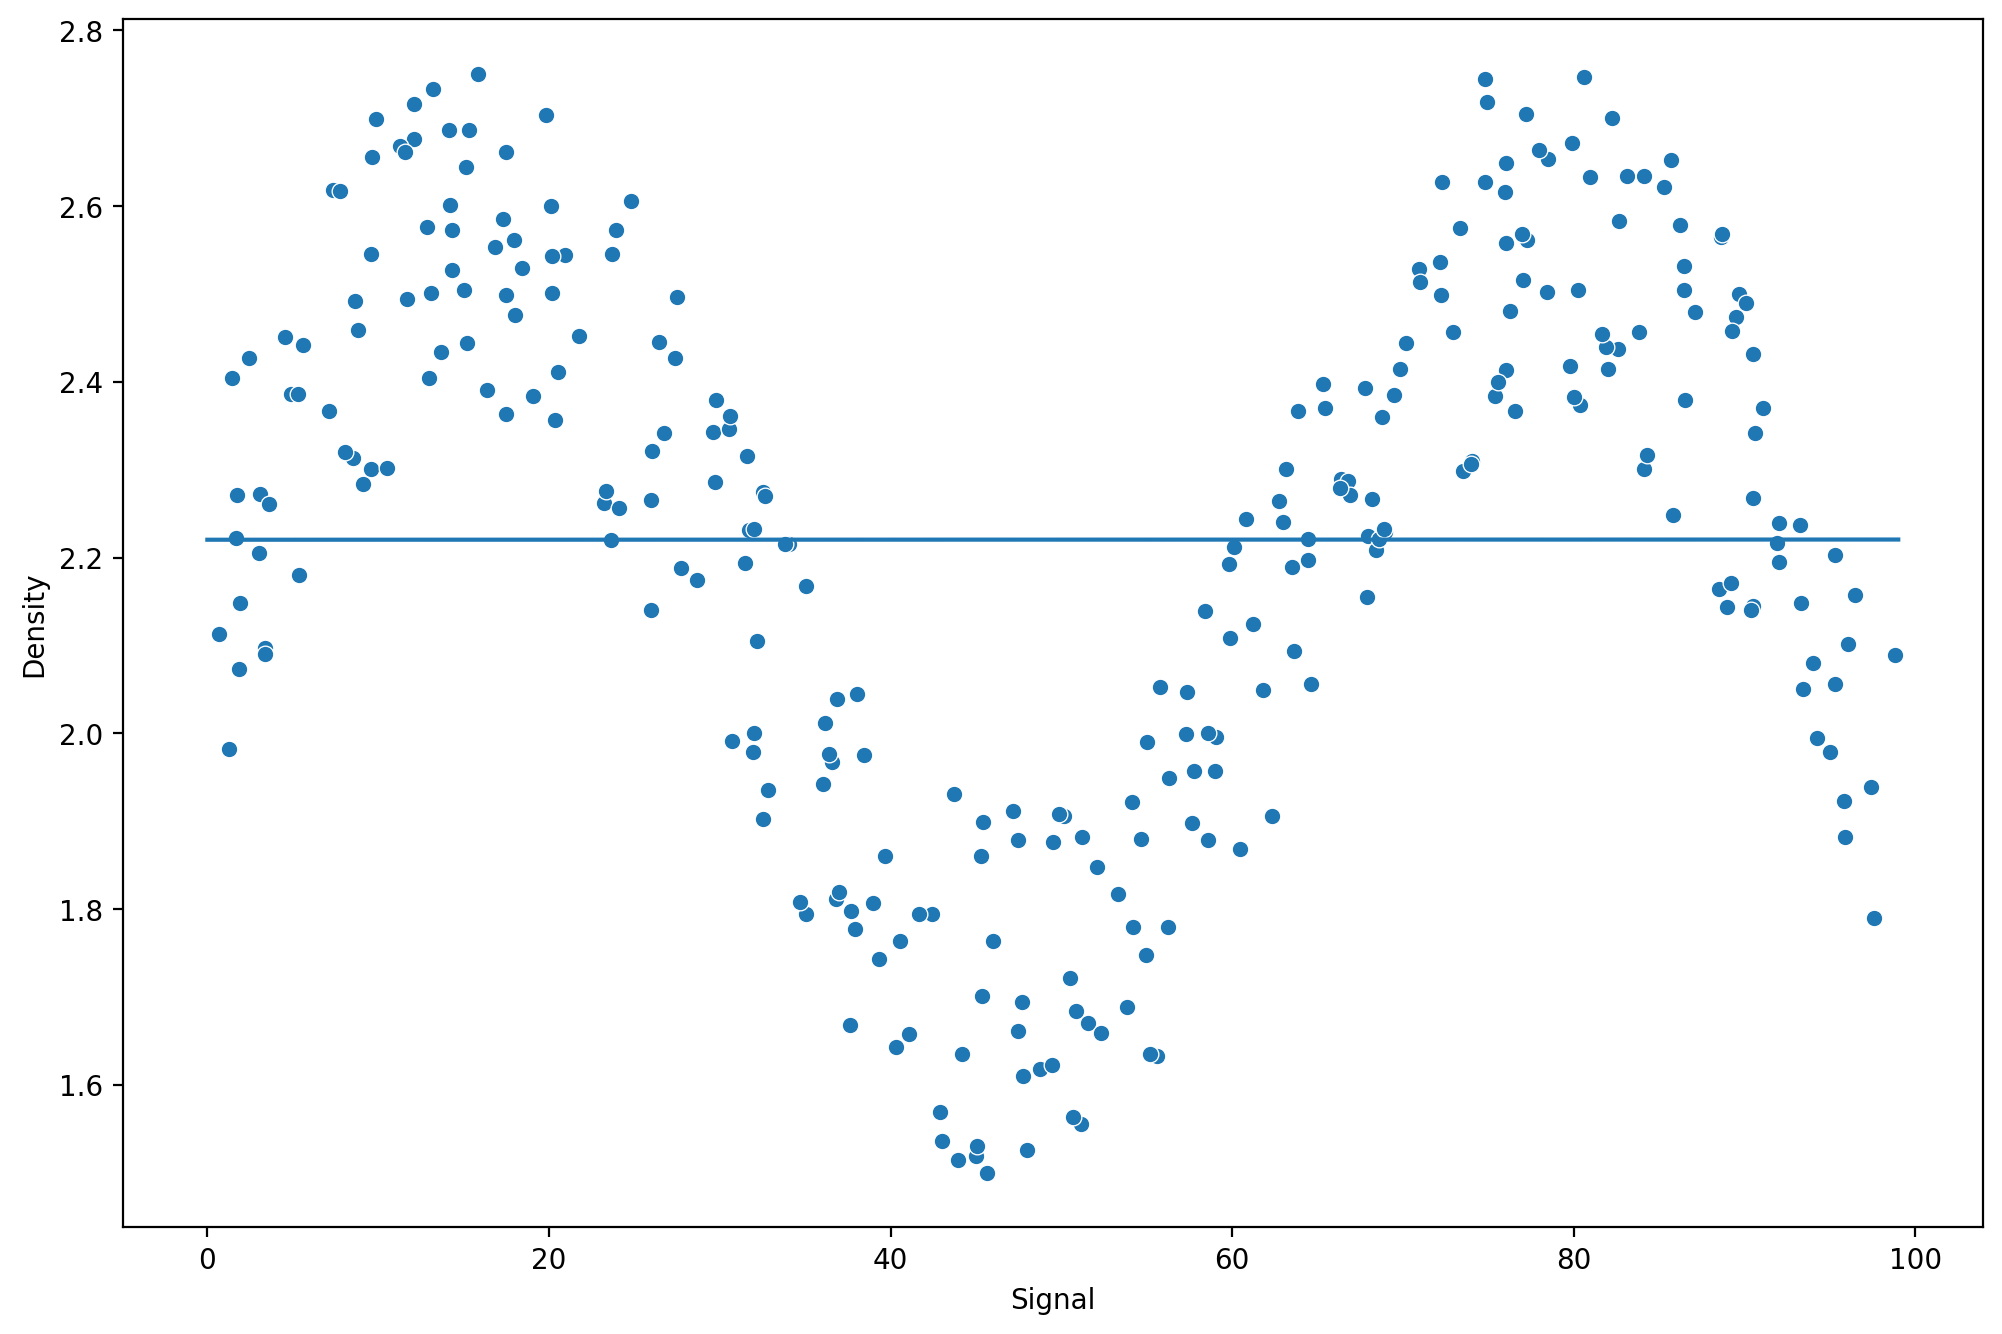

In [90]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

plt.plot(signal_range, signal_preds)

## 2) Polynomial Regression ##

In [91]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE : {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize = (12, 8), dpi = 200)
    sns.scatterplot(x = 'Signal', y = 'Density', data = df, color = 'black')
    
    plt.plot(signal_range, signal_preds)

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [113]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE : 0.11969124768718563
RMSE: 0.13807452757754915


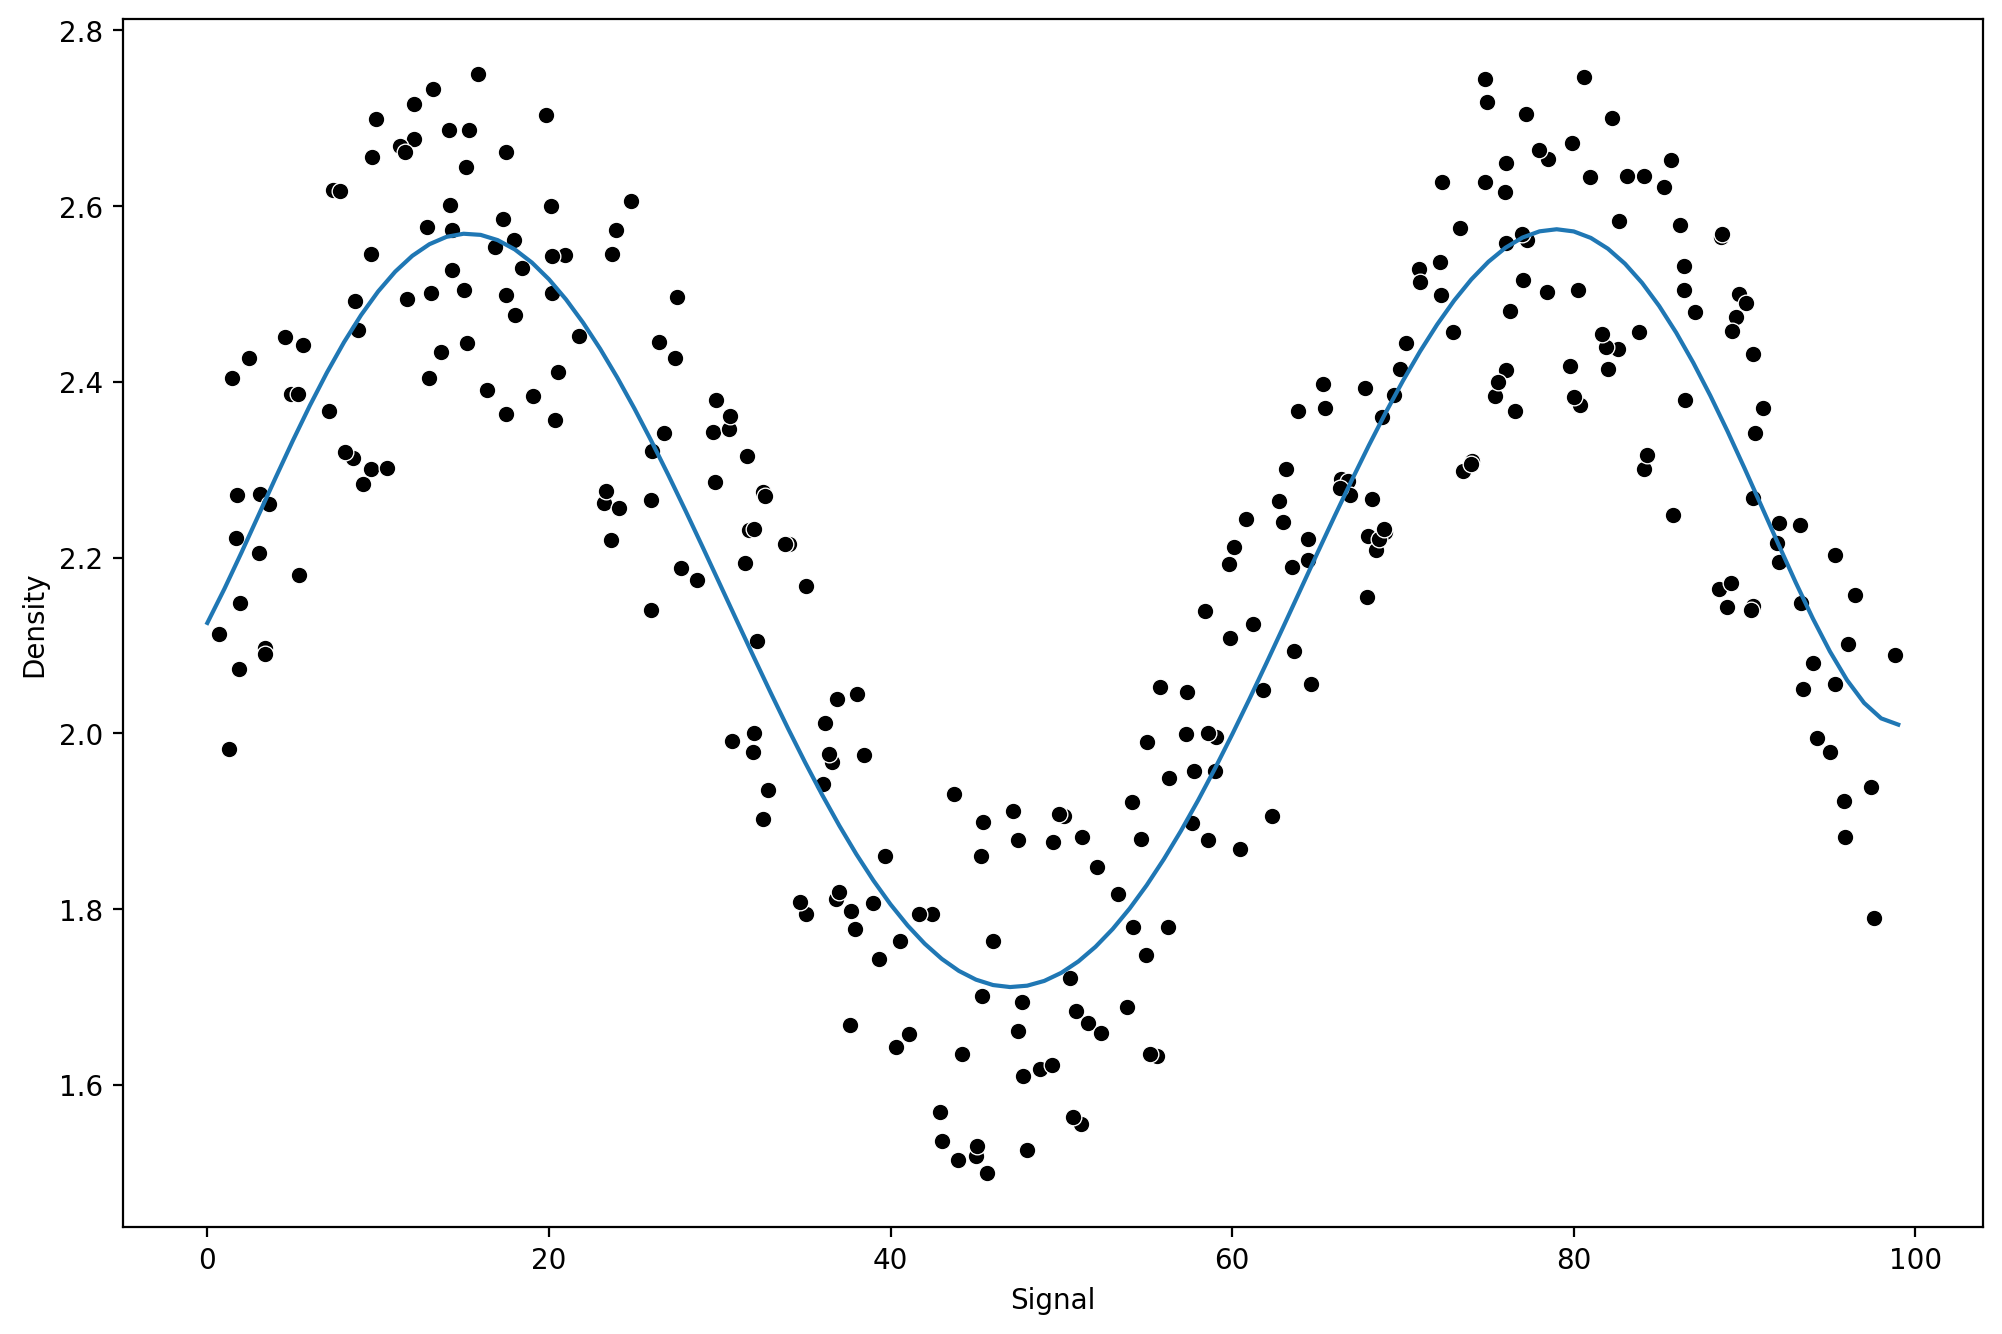

In [114]:
run_model(pipe, X_train, y_train, X_test, y_test)

## 3) KNN ##

In [95]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.13363165935705318
RMSE: 0.15954234753677107


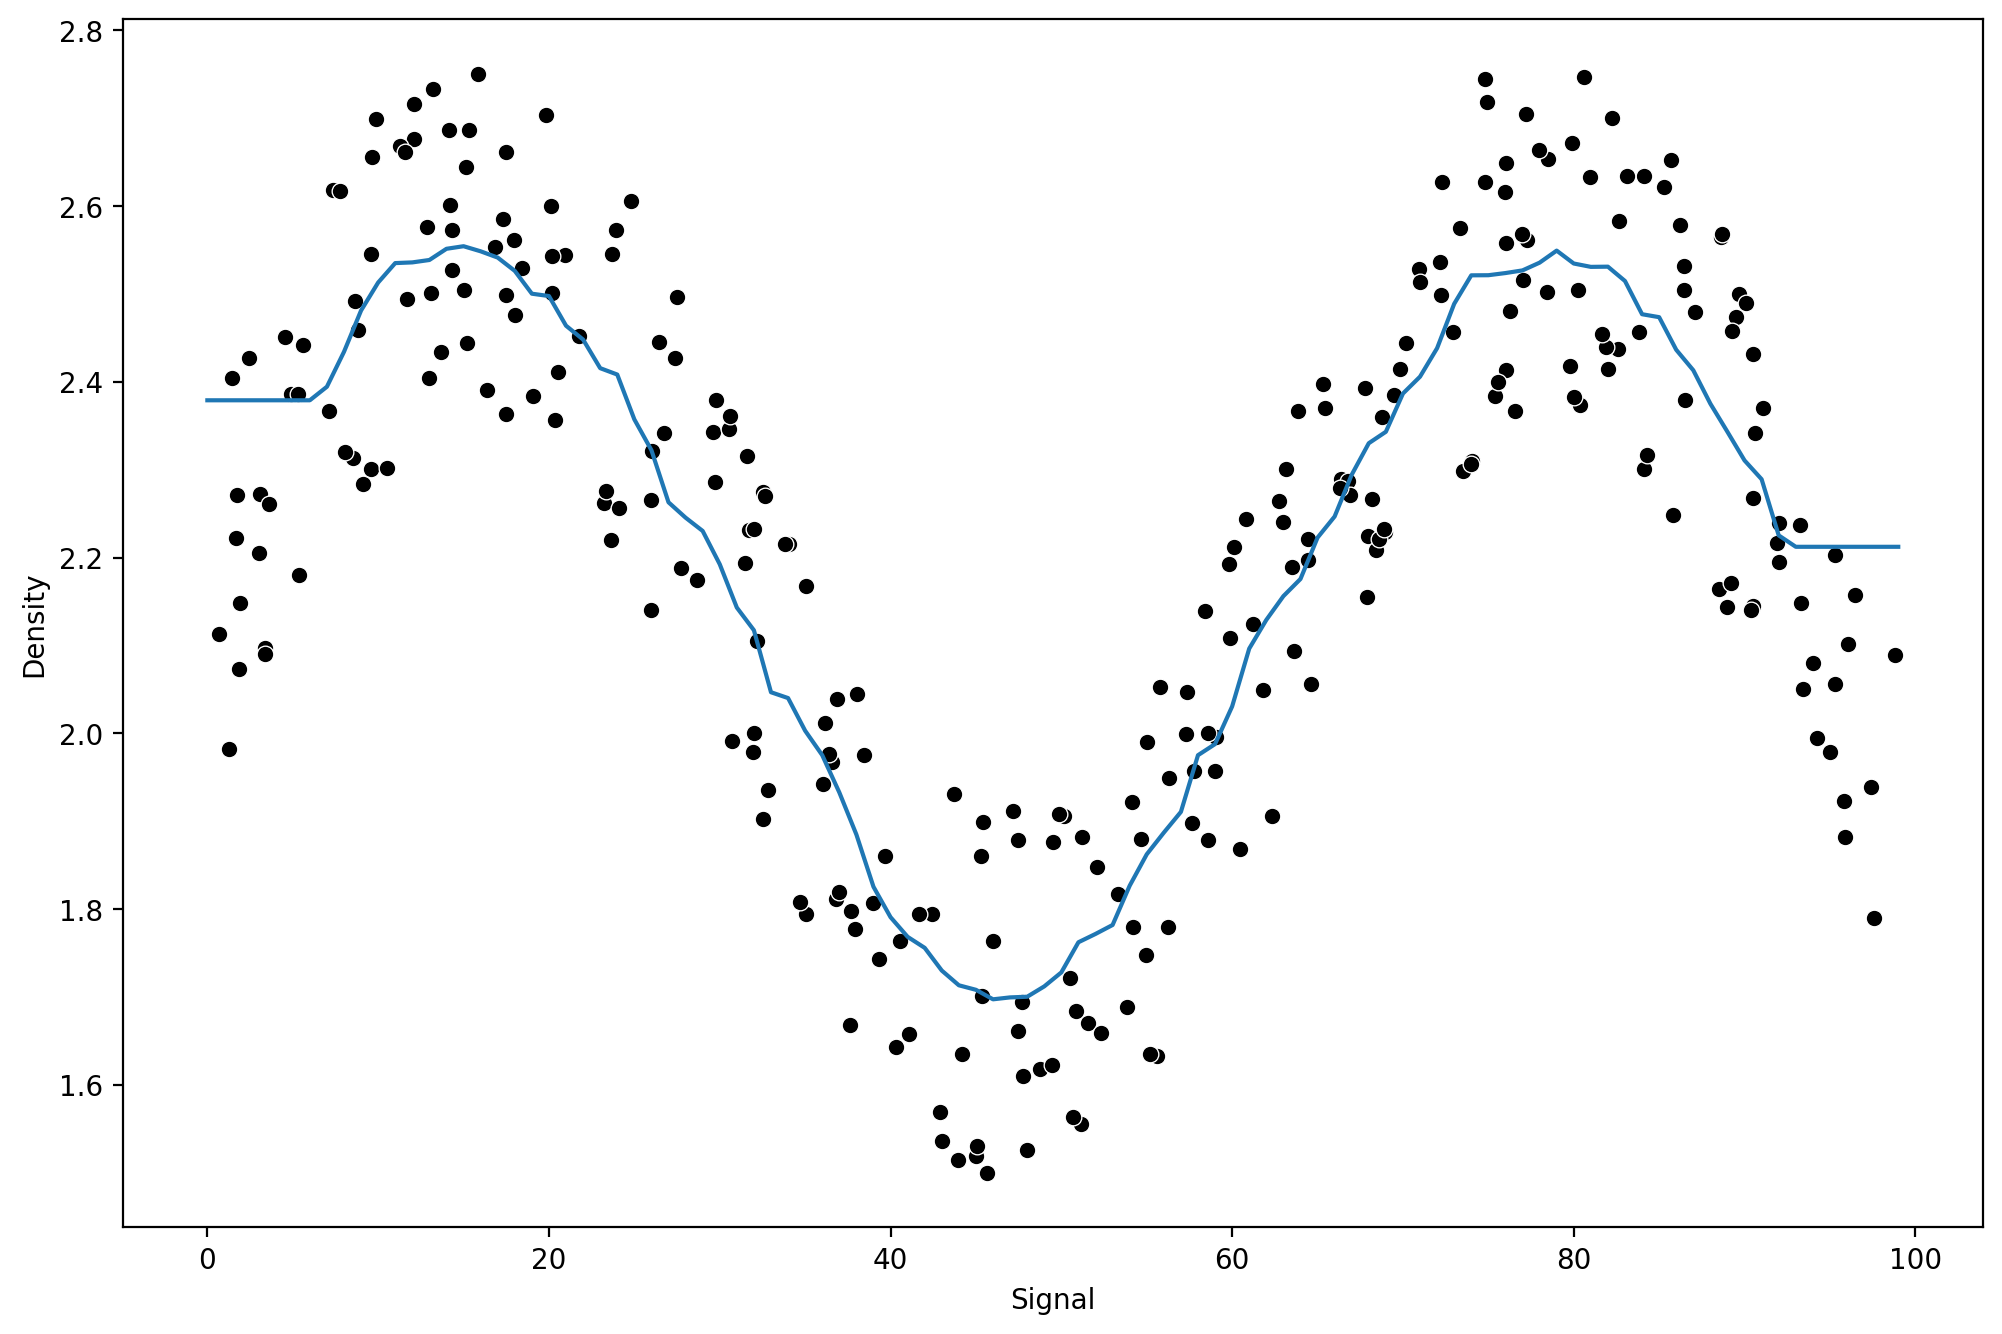

In [108]:
k_values = [30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

## 4) Decision Tree Regressor ##

In [97]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
RMSE: 0.1523487028635337


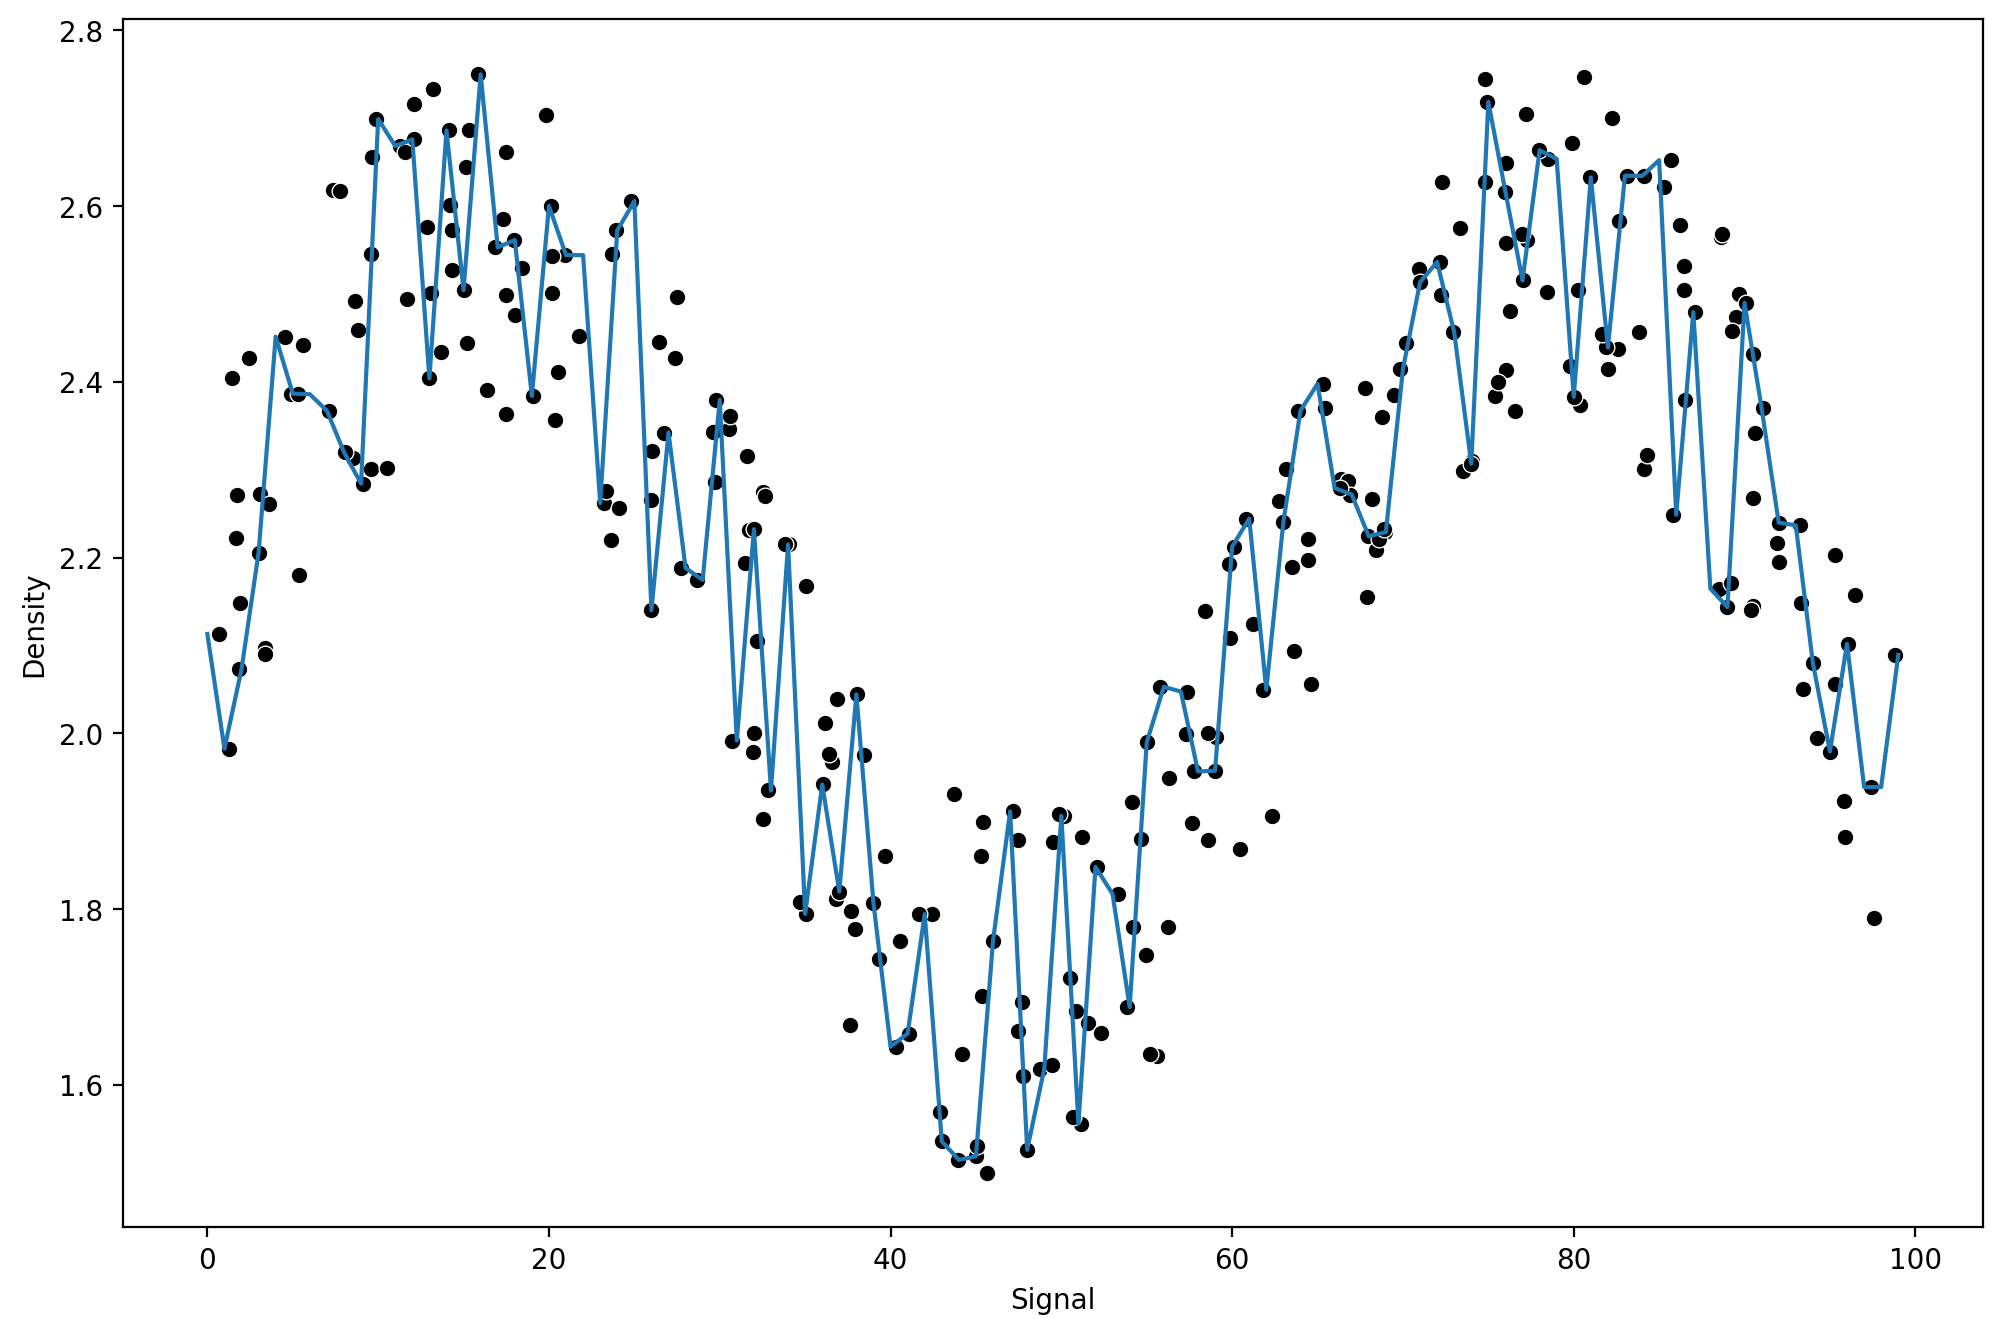

In [98]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

## 5) SVM ##

In [99]:
from sklearn.svm import SVR

In [100]:
from sklearn.model_selection import GridSearchCV

In [103]:
svr = SVR()
param_grid = {'C' : [0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma' : ['auto', 'scale']}


grid = GridSearchCV(svr, param_grid)

MAE : 0.10854210121348368
RMSE: 0.12646999302046696


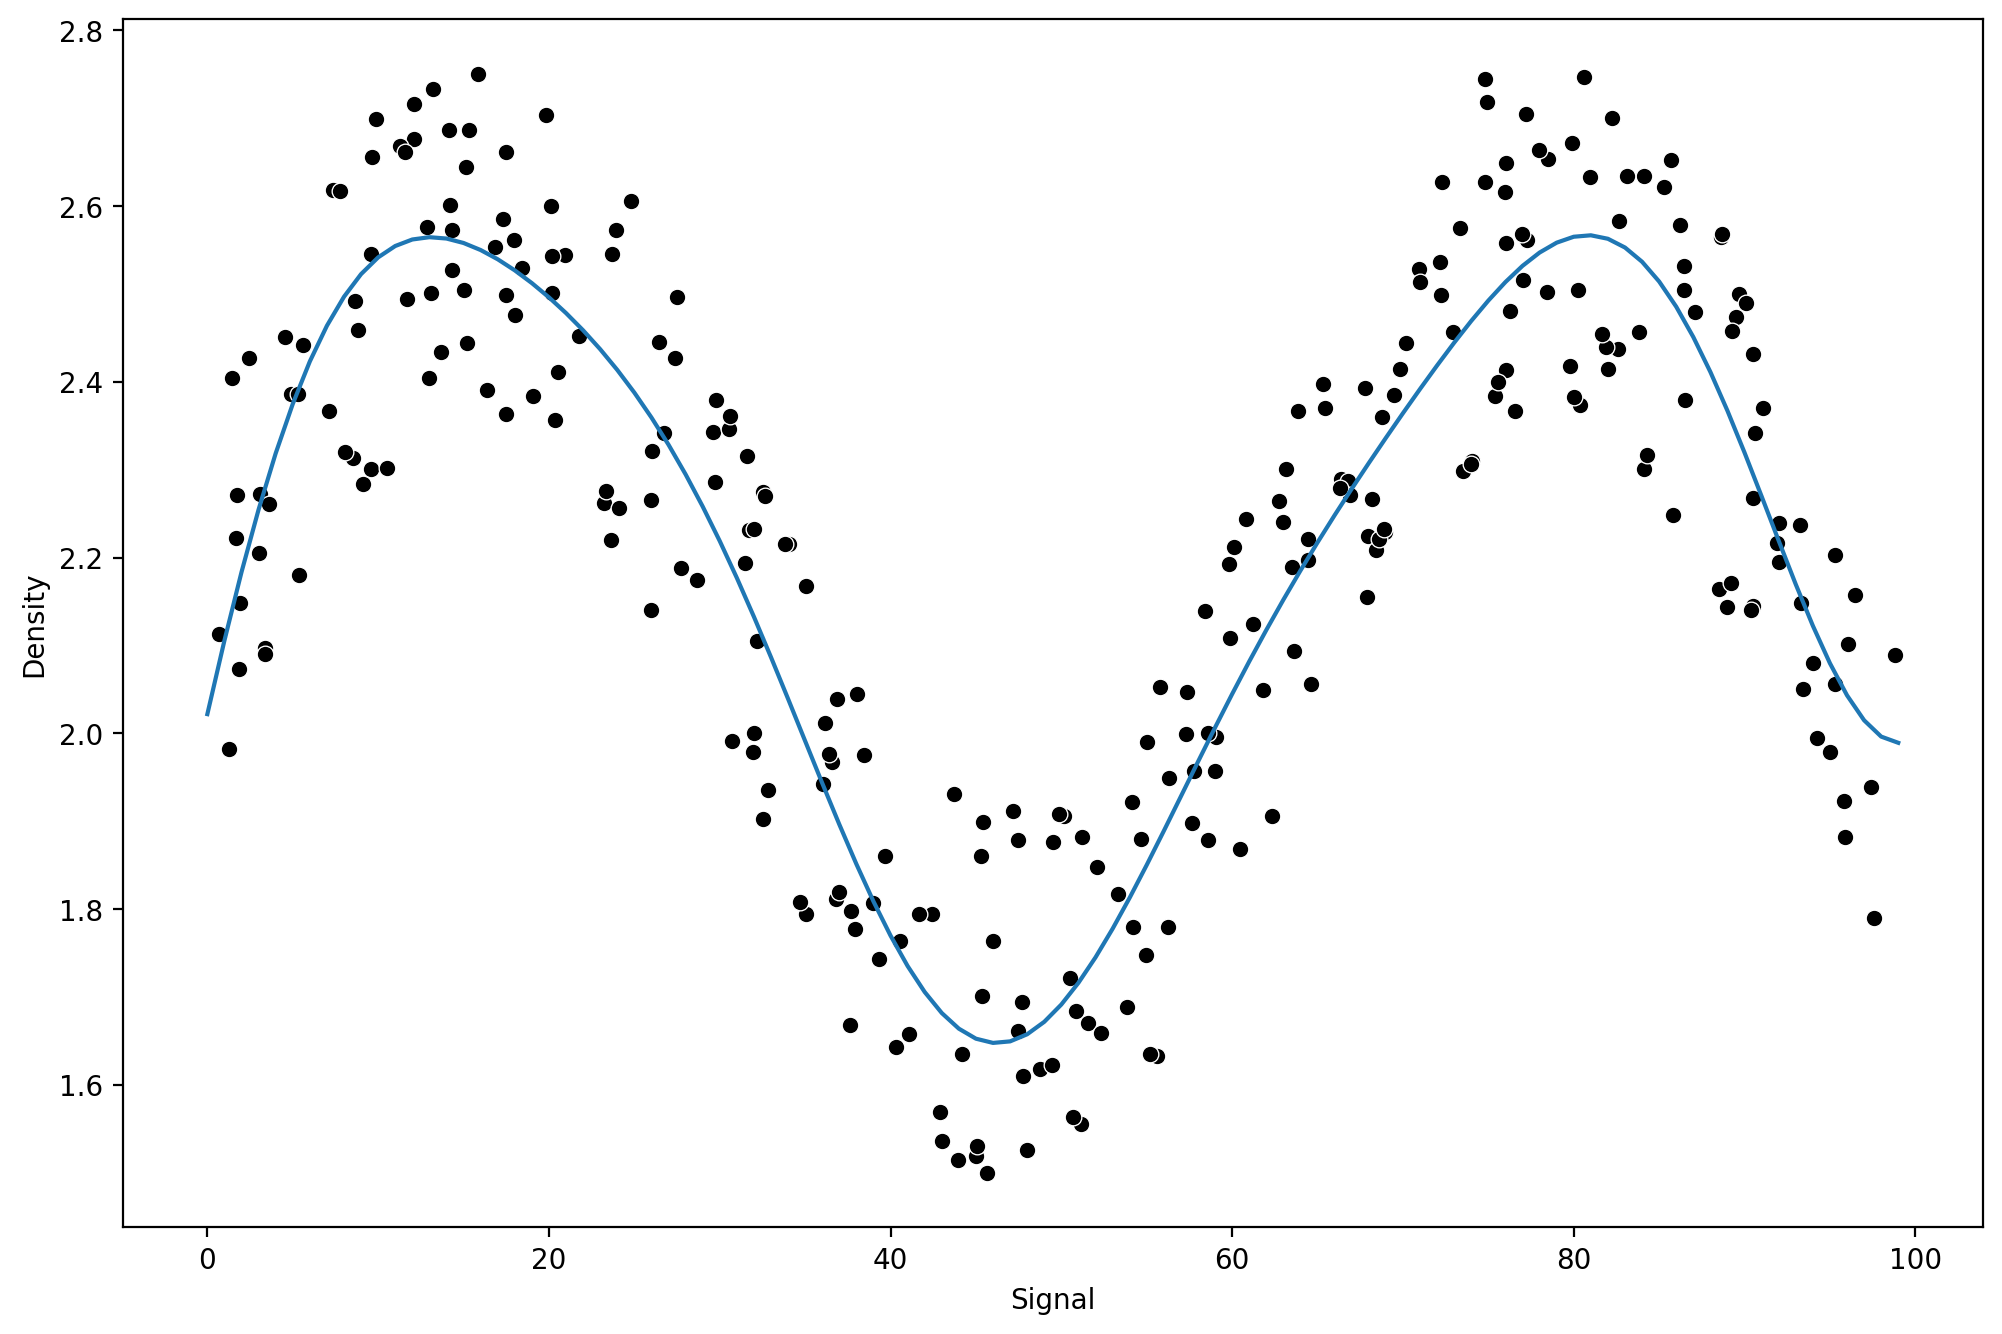

In [104]:
run_model(grid, X_train, y_train, X_test, y_test)

## 6) Random Forest ##

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.11511978715787598
RMSE: 0.14169697237208054


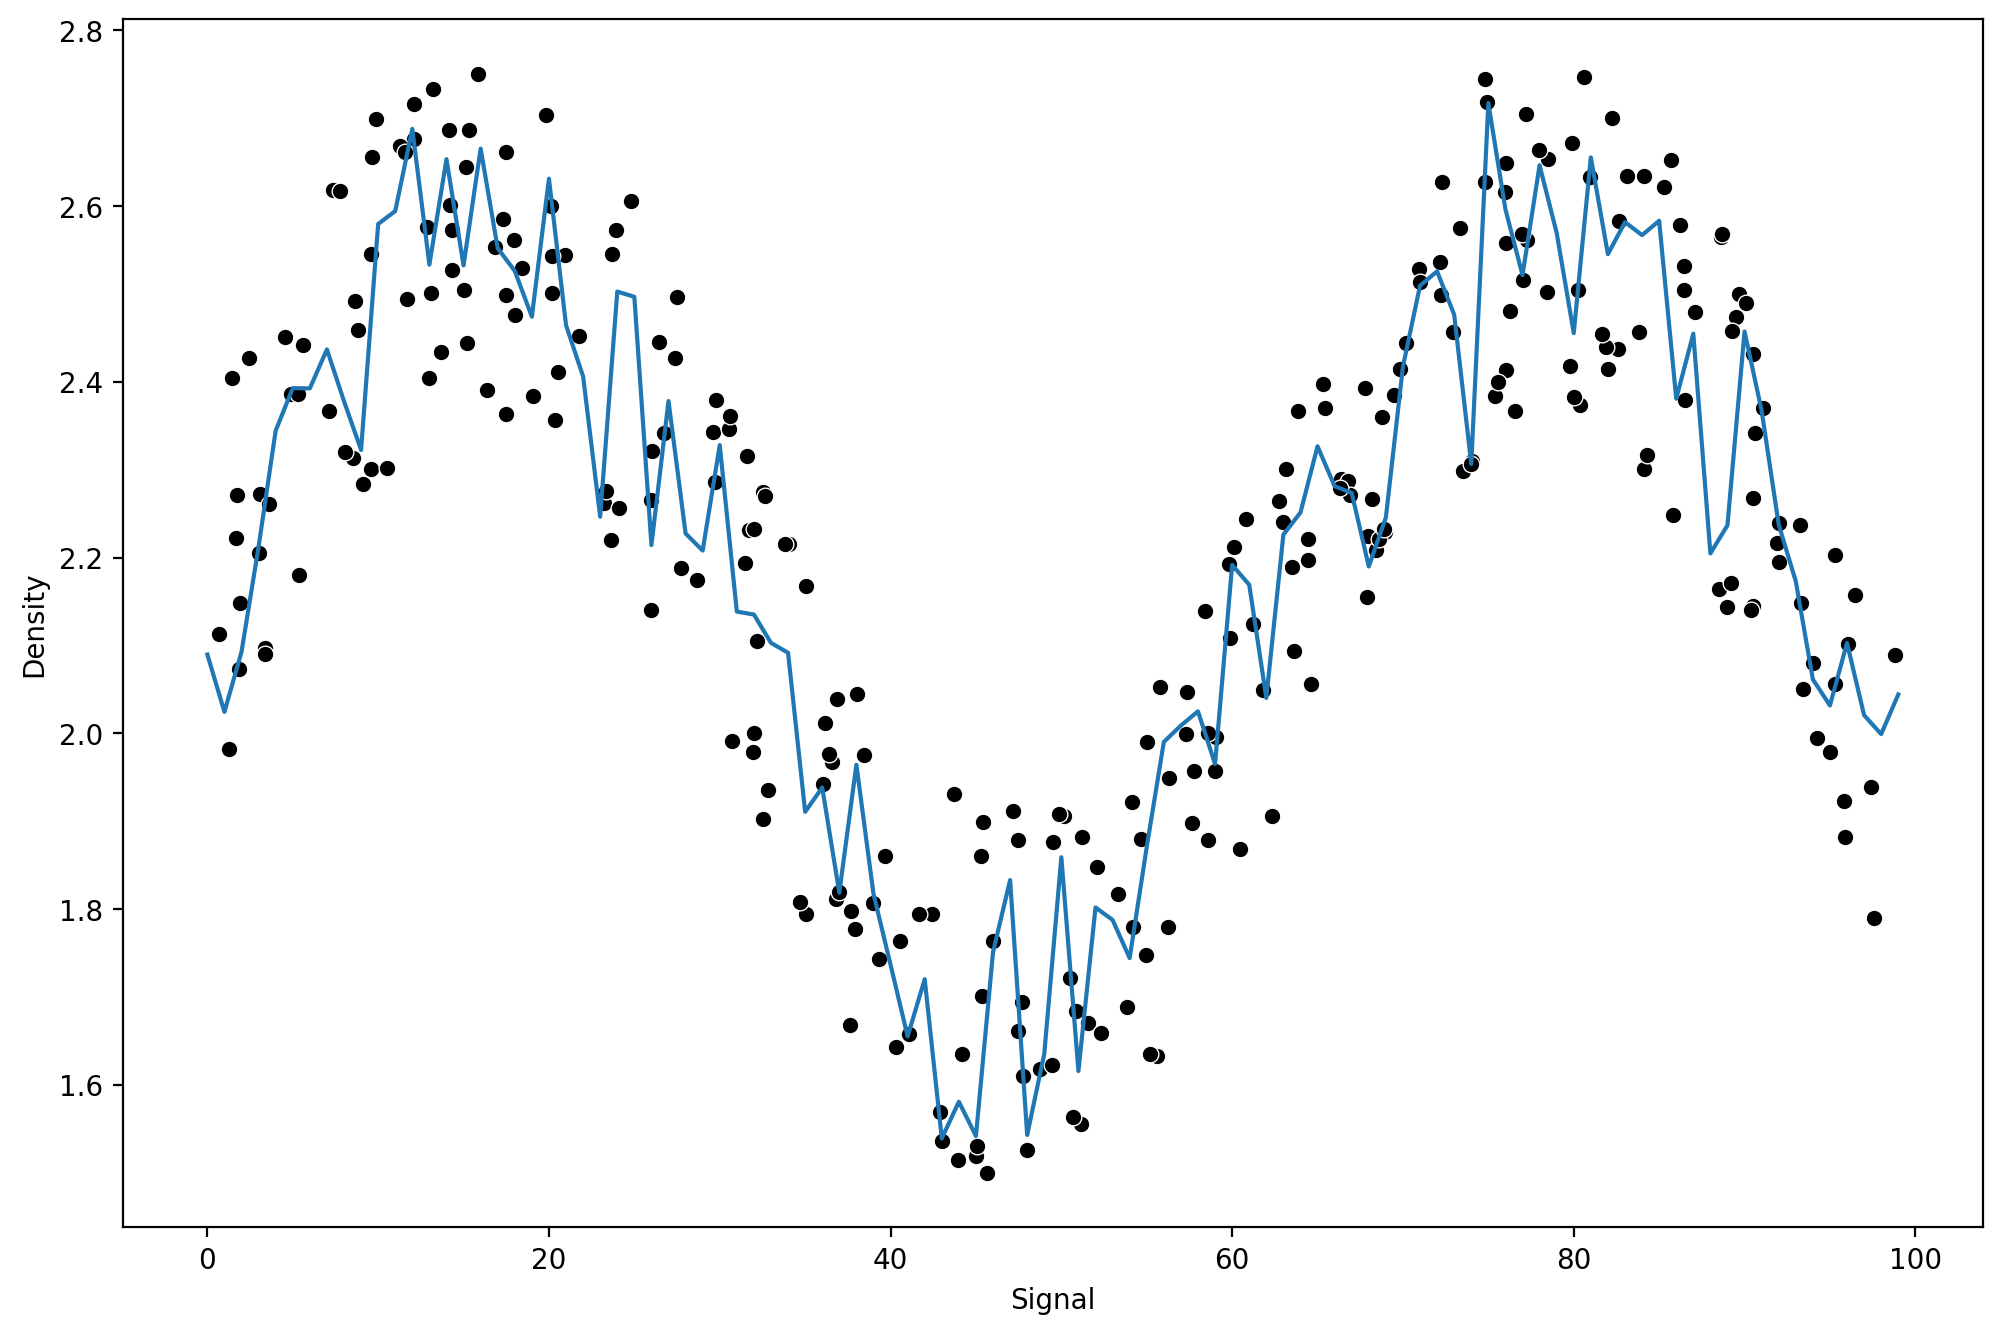

In [118]:
run_model(rfr, X_train, y_train, X_test, y_test)